In [2]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

In [3]:
states = pd.read_csv('../ml/state_poverty_and_income.csv')

In [4]:
# states.head()

In [5]:
# states = states[['STATE', 'OCC_TITLE', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75', 'LOC_QUOTIENT', 'SAEPOVRTALL_PT']]

In [6]:
states = states[states['OCC_TITLE'] == 'All Occupations'].drop(columns = 'OCC_TITLE')

In [7]:
states = pd.get_dummies(states, columns = ['STATE'], drop_first = True)

In [8]:
target = 'SAEPOVRTALL_PT'
X = states.drop([target], axis=1)
y = states[target]
X = X.select_dtypes(exclude=['object'])

In [9]:
states.columns[50:109]

Index(['SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90', 'SAEPOVRTALL_LB90',
       'SAEPOVRTALL_MOE', 'SAEPOVRTALL_PT', 'SAEPOVRTALL_UB90', 'SAEPOVU_0_17',
       'SAEPOVU_0_4', 'SAEPOVU_5_17R', 'SAEPOVU_ALL', 'STATE_Alaska',
       'STATE_Arizona', 'STATE_Arkansas', 'STATE_California', 'STATE_Colorado',
       'STATE_Connecticut', 'STATE_Delaware', 'STATE_Florida', 'STATE_Georgia',
       'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Indiana',
       'STATE_Iowa', 'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana',
       'STATE_Maine', 'STATE_Maryland', 'STATE_Massachusetts',
       'STATE_Michigan', 'STATE_Minnesota', 'STATE_Mississippi',
       'STATE_Missouri', 'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada',
       'STATE_New Hampshire', 'STATE_New Jersey', 'STATE_New Mexico',
       'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
       'STATE_Ohio', 'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
       'STATE_Rhode Island', 'STATE_South Carolina',

Feature selection

In [18]:
features = ['TOT_EMP', 'JOBS_1000']
features2 = ['TOT_EMP', 'JOBS_1000', 'A_PCT90']
features3 = ['AREA', 'JOBS_1000', 'A_PCT75']
features4 = ['AREA', 'TOT_EMP', 'JOBS_1000', 'LOC_QUOTIENT']
features5 = ['AREA', 'TOT_EMP', 'JOBS_1000', 'A_PCT75', 'LOC_QUOTIENT']
features6 = ['AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75']
features7 = ['AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75', 'LOC_QUOTIENT']
features8 = ['AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75', 'LOC_QUOTIENT', 
             'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 
             'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 
             'A_PCT90']
features9 = ['STATE_Alaska','STATE_Arizona', 'STATE_Arkansas', 'STATE_California', 'STATE_Colorado',
'STATE_Connecticut', 'STATE_Delaware', 'STATE_Florida', 'STATE_Georgia',
'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Indiana',
'STATE_Iowa', 'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana',
'STATE_Maine', 'STATE_Maryland', 'STATE_Massachusetts',
'STATE_Michigan', 'STATE_Minnesota', 'STATE_Mississippi',
'STATE_Missouri', 'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada',
'STATE_New Hampshire', 'STATE_New Jersey', 'STATE_New Mexico',
'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
'STATE_Ohio', 'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
'STATE_Rhode Island', 'STATE_South Carolina', 'STATE_South Dakota',
'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah', 'STATE_Vermont',
'STATE_Virginia', 'STATE_Washington', 'STATE_West Virginia',
'STATE_Wisconsin', 'STATE_Wyoming']
features10 = ['TOT_EMP'] + features9
features11 = ['JOBS_1000'] + features9
features12 = ['LOC_QUOTIENT'] + features9
features13 = ['LOC_QUOTIENT', 'JOBS_1000'] + features9
features14 = ['LOC_QUOTIENT', 'TOT_EMP'] + features9
features15 = ['JOBS_1000', 'TOT_EMP'] + features9


features_list = [features9, features10,
                 features11, features12, features13, features14, features15]

for x, features in enumerate(features_list):
    X = states[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=1000, random_state=101, oob_score=True)
    model.fit(X_train, y_train)
    score= model.score(X_train, y_train)
    score_val = model.score(X_test, y_test)
    print(f'features: {features}')
    print(f'           score: {score}')
    print(f'       score_val: {score_val}')
    y_pred = model.predict(X_test)
    # print(f'             MAE: {mean_absolute_error(y_test, y_pred)}')
    # print(f'             MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'Out-of-Bag Score: {model.oob_score_}')

features: ['STATE_Alaska', 'STATE_Arizona', 'STATE_Arkansas', 'STATE_California', 'STATE_Colorado', 'STATE_Connecticut', 'STATE_Delaware', 'STATE_Florida', 'STATE_Georgia', 'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Indiana', 'STATE_Iowa', 'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana', 'STATE_Maine', 'STATE_Maryland', 'STATE_Massachusetts', 'STATE_Michigan', 'STATE_Minnesota', 'STATE_Mississippi', 'STATE_Missouri', 'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada', 'STATE_New Hampshire', 'STATE_New Jersey', 'STATE_New Mexico', 'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota', 'STATE_Ohio', 'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania', 'STATE_Rhode Island', 'STATE_South Carolina', 'STATE_South Dakota', 'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah', 'STATE_Vermont', 'STATE_Virginia', 'STATE_Washington', 'STATE_West Virginia', 'STATE_Wisconsin', 'STATE_Wyoming']
           score: 0.9491499131658414
       score_val: 0.9312472656594908
Out-of-Bag

#### -final model-

In [75]:
features = ['TOT_EMP', 'JOBS_1000', 'LOC_QUOTIENT', 'STATE_Alaska','STATE_Arizona', 'STATE_Arkansas', 'STATE_California', 'STATE_Colorado',
'STATE_Connecticut', 'STATE_Delaware', 'STATE_Florida', 'STATE_Georgia',
'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Indiana',
'STATE_Iowa', 'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana',
'STATE_Maine', 'STATE_Maryland', 'STATE_Massachusetts',
'STATE_Michigan', 'STATE_Minnesota', 'STATE_Mississippi',
'STATE_Missouri', 'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada',
'STATE_New Hampshire', 'STATE_New Jersey', 'STATE_New Mexico',
'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
'STATE_Ohio', 'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
'STATE_Rhode Island', 'STATE_South Carolina', 'STATE_South Dakota',
'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah', 'STATE_Vermont',
'STATE_Virginia', 'STATE_Washington', 'STATE_West Virginia',
'STATE_Wisconsin', 'STATE_Wyoming']
X = states[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=10000, random_state=0, oob_score=True)
model.fit(X_train, y_train)
score= model.score(X_train, y_train)
score_val = model.score(X_test, y_test)
print(f'           score: {score}')
print(f'       score_val: {score_val}')
y_pred = model.predict(X_test)
print(f'             MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'             MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Out-of-Bag Score: {model.oob_score_}')

           score: 0.9840503363854348
       score_val: 0.9173000217463394
             MAE: 0.6511915999999291
             MSE: 0.6687239329559685
Out-of-Bag Score: 0.8814185100718742


We chose to use these features for our model becuase, although it doesn't have quite as high of r^2, it has by far the best Out-of-bag score (ie highest cross validation accuracy). Other models may have had higher r^2 but they had low OOB meaning they were overfitting on the training data. 

In [73]:
y_pred

array([14.2756, 10.4071, 16.0207,  9.3012, 12.1222, 13.9225, 14.1696,
       13.4779, 14.3326, 12.8682, 16.5202, 15.8421, 12.5663, 12.6849,
       18.8267, 12.2865, 10.2301, 11.6834, 13.9074, 12.999 , 14.1508,
        9.5108, 11.2381, 10.8036, 10.6192, 10.1391,  9.5906,  9.2694,
       18.0624, 10.0601, 10.0254, 10.7538, 14.0955,  9.4978, 12.6948,
       10.7101, 10.8497, 10.7868, 17.6196, 14.2357, 10.4448, 10.2429,
       13.5406, 15.073 ,  9.0345, 16.1507, 10.0942,  9.5173, 19.3424,
       12.2783])

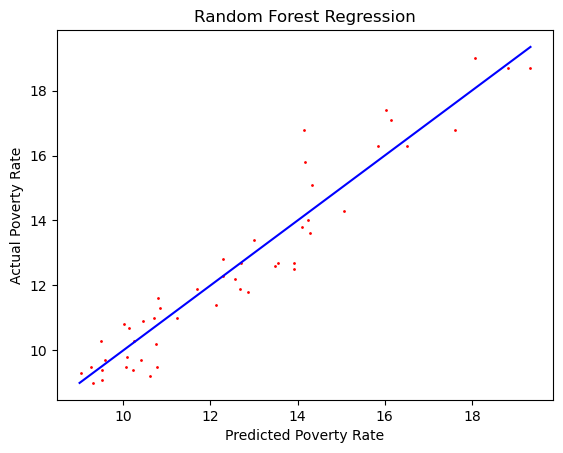

In [74]:
plt.scatter(y_pred, y_test, color = 'red', s=1)
plt.title('Random Forest Regression')
plt.xlabel('Predicted Poverty Rate')
plt.ylabel('Actual Poverty Rate')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1,p2], [p1,p2], 'b-')

plt.show()

In [24]:
X
X.dtypes
states[['SAEPOVRTALL_PT', 'AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75']].head()

,SAEPOVRTALL_PT,AREA,JOBS_1000,A_MEAN,A_MEDIAN,A_PCT75
0,16.9,1,1000.000,43170.0,32800.0,52020.0
1,16.9,1,36.385,111150.0,96980.0,133360.0
2,16.9,1,0.280,123430.0,110350.0,155860.0
3,16.9,1,1.157,126630.0,111680.0,153960.0
4,16.9,1,0.222,94270.0,82400.0,106530.0


In [25]:
def predict(area, jobs_1000, a_mean, a_median, a_pct75, x = X):
    newdf = X[X['AREA'] == area].head(1)
    newdf['JOBS_1000'] = jobs_1000
    newdf['A_MEAN'] = a_mean
    newdf['A_MEDIAN'] = a_median
    newdf['A_PCT75'] = a_pct75
    result = model.predict(newdf)
    return result

print(predict(1, 36.385, 111150.0, 96980.0, 133360.0))
#     result = model.predict(newdf)
#     return result

# print(predict(2021, 78437, 'Alaska'))

[16.341]


In [31]:
filename = "../ml/viking_model.pickle"

pickle.dump(model, open(filename, "wb"))


In [27]:
loaded_model = pickle.load(open(filename, "rb"))

In [32]:
features = ['AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75']
target = "SAEPOVRTALL_PT"
X = states.drop([target], axis=1)
X = X.select_dtypes(exclude=['object'])
y = states[target]
X = states[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
loaded_model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
loaded_model.fit(X_train, y_train)
score= loaded_model.score(X_train, y_train)
score_val = loaded_model.score(X_test, y_test)
print(f'score: {score}, score_val: {score_val}')

score: 0.9931726979449461, score_val: 0.9507020223154418
